In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1. Edge and Corner Detection
1.1 Sobel and Prewitt
Explanation of Sobel and Prewitt filters.
Python code for visualization on an example image.
1.2 Canny Edge Detector
Explanation of the Canny method.
Implementation and visualization.
1.3 Harris and Shi-Tomasi Corner Detection
Explanation of both methods.
Code for detecting corners.
2. Texture Analysis
2.1 Histogram of Oriented Gradients (HOG)
Explanation of HOG.
Visualization of gradient directions.
2.2 Local Binary Patterns (LBP)
Explanation of LBP and texture representation.
Implementation and visualization.
2.3 Gray Level Co-occurrence Matrix (GLCM)
Explanation of GLCM.
Visualization of texture features.
3. Contour and Shape Features
3.1 Fourier Descriptors
Explanation of Fourier descriptors for shape representation.
Visualization of contours and Fourier coefficients.
3.2 Hu Moments and Zernike Moments
Explanation of these moments for shape analysis.
Visualization of shape invariants.
4. Region-based Features
4.1 SIFT and SURF
Explanation of SIFT and SURF.
Keypoint detection visualization.
4.2 ORB, FAST, and BRIEF
Explanation and comparison.
Visualization of extracted keypoints.
5. Frequency Domain Features
5.1 Discrete Fourier Transform (DFT)
Explanation of Fourier Transform in the frequency domain.
Visualization of the frequency spectrum.
5.2 Discrete Wavelet Transform (DWT)
Explanation of DWT.
Visualization of decomposed image levels.
5.3 Gabor Filters
Explanation of Gabor filters for texture and orientation.
Visualization of filtered images.
6. Color and Intensity Features
6.1 Color Histograms
Explanation of color histogram features.
Visualization for an RGB image.
6.2 Color Moments
Explanation of moments for color distributions.
Code for calculation and visualization.
6.3 Normalized RGB or HSV
Explanation of normalized color spaces.
Visualization of RGB and HSV transformations.
7. Keypoint Detection and Matching
7.1 MSER
Explanation of MSER for region-based features.
Visualization of extracted regions.
7.2 KAZE and AKAZE
Explanation and keypoint matching demonstration.

# Traditional Feature Extraction in Computer Vision

## Edge and Corner Detection

Here, we try out Sobel, Prewitt filter and Harris and Shi-Tomasi Corner Detection.

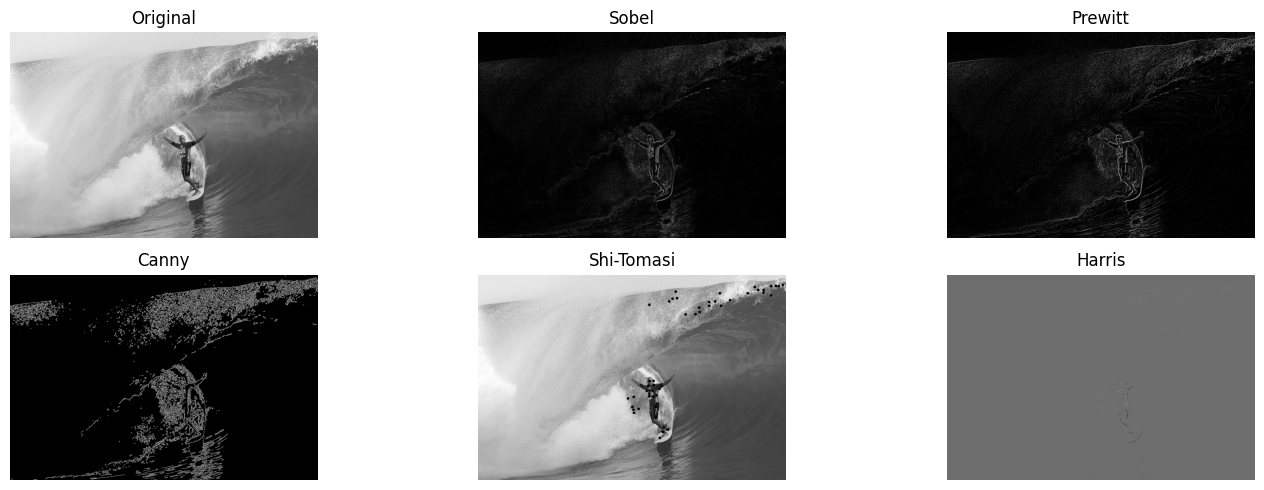

In [9]:
from edge_detection import apply_canny, apply_sobel, apply_prewitt, shi_tomasi_corners, harris_corners
from visualize import visualize_images
import cv2

image = cv2.imread('surfer.jpg', cv2.IMREAD_GRAYSCALE)

sobel = apply_sobel(image)
prewitt = apply_prewitt(image)
canny = apply_canny(image)
shi_tomasi = shi_tomasi_corners(image)
harris = harris_corners(image)

visualize_images(
    [image, sobel, prewitt, canny, shi_tomasi, harris], 
    titles=["Original", "Sobel", "Prewitt", "Canny", "Shi-Tomasi", "Harris"]
)

## Texture Analysis

Here we analyse the texture using Histogram of Oriented Gradients, Local Binary Patterns, and Gray Level Co-occurrence Matrix.

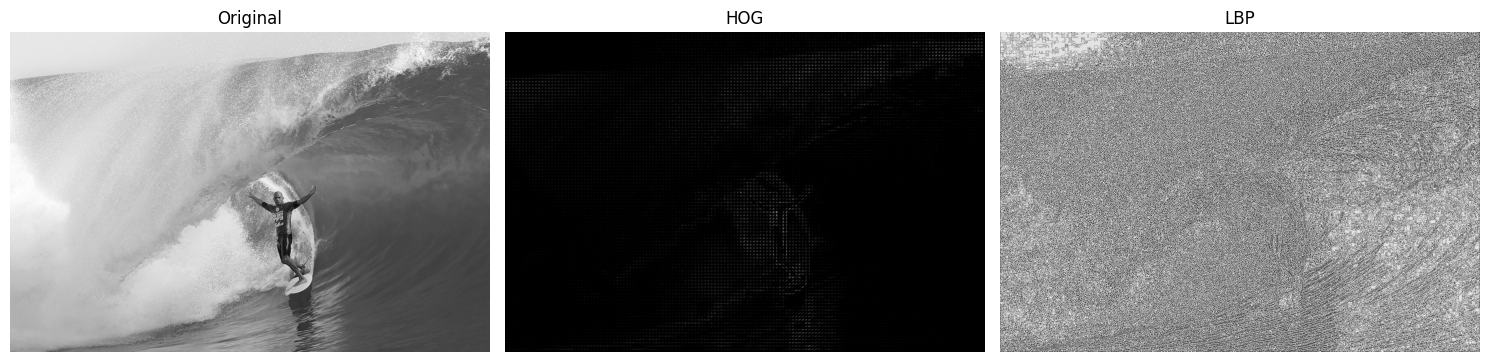

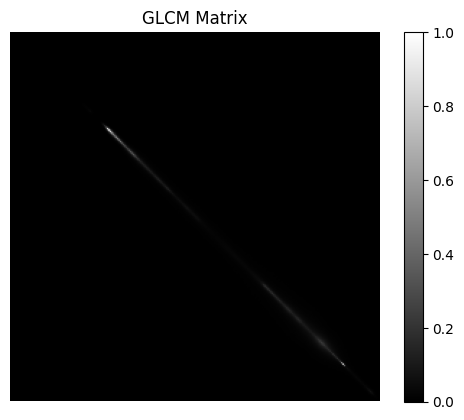

In [10]:
from texture_analysis import compute_hog, compute_lbp, compute_glcm, show_glcm  

hog = compute_hog(image)
lbp = compute_lbp(image)
glcm = compute_glcm(image)

visualize_images(
    [image, hog, lbp], 
    titles=["Original", "HOG", "LBP"]
)
show_glcm(glcm)

## Contour and Shape Features

Fourier Descriptors and Hu/Zernike Moments

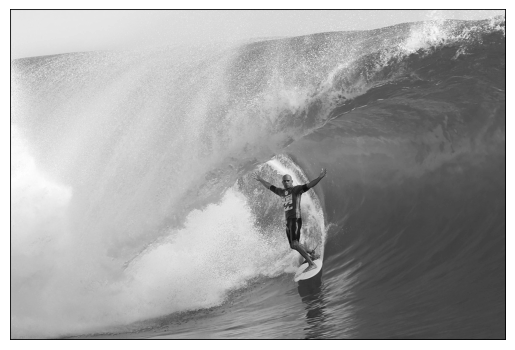

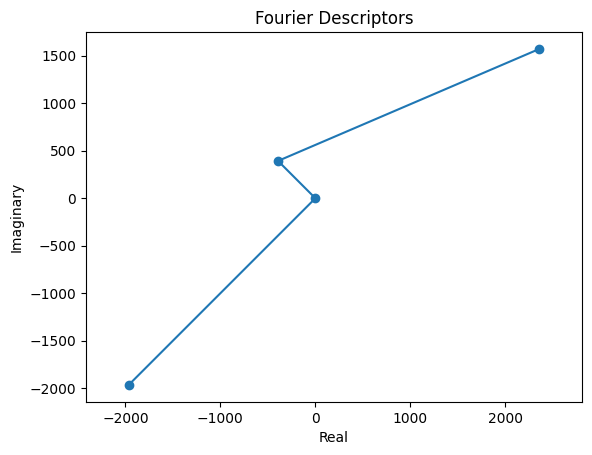

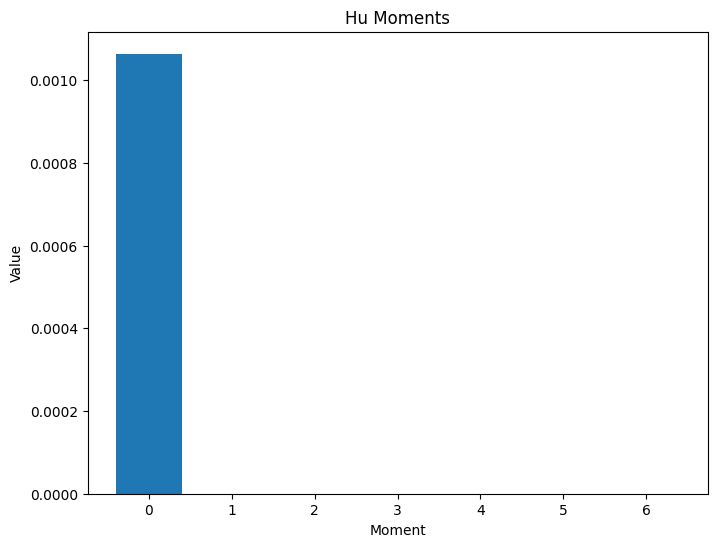

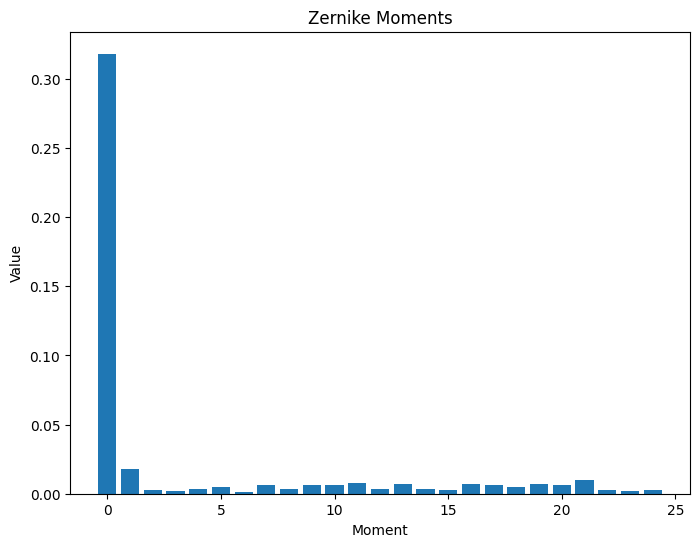

In [11]:
from contour_features import compute_fourier_descriptors, compute_hu_moments, compute_zernike_moments, compute_contour, display_contour, display_fourier_descriptors, display_hu_moments, display_zernike_moments

contour = compute_contour(image)
fourier_descriptors = compute_fourier_descriptors(contour)
hu_moments = compute_hu_moments(image)
zernike_moments = compute_zernike_moments(image)

display_contour(image, contour)
display_fourier_descriptors(fourier_descriptors)
display_hu_moments(hu_moments)
display_zernike_moments(zernike_moments)

## Region-based features

SIFT, SURF, ORB, FAST, BRIEF

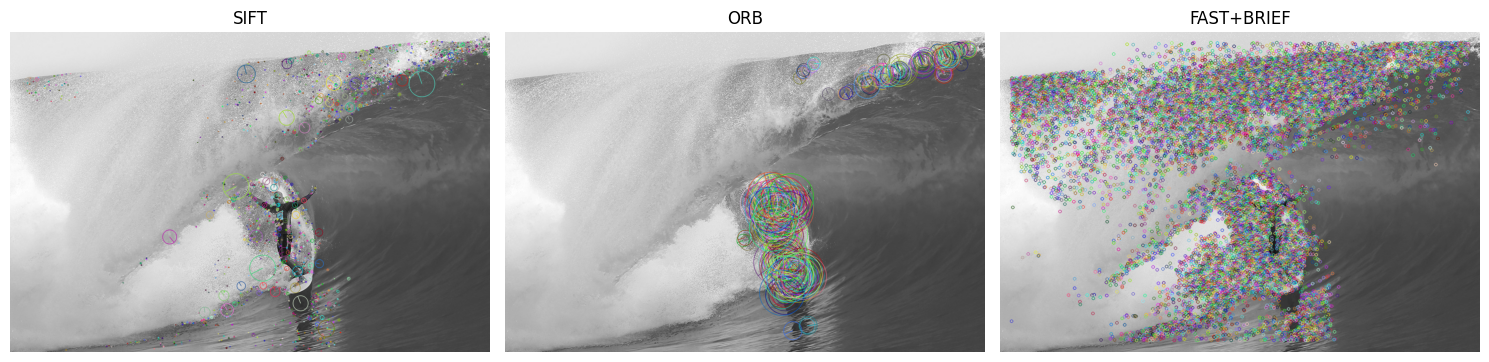

In [12]:
from region_based_features import sift_features, surf_features, orb_features, fast_brief_features

sift_keypoints, sift_descriptor = sift_features(image)
# surf_keypoints, surf_descriptor = surf_features(image)
orb_keypoints, orb_descriptor = orb_features(image)
fast_brief_keypoints, fast_brief_descriptor = fast_brief_features(image)

images = []
for keypoints in [sift_keypoints, orb_keypoints, fast_brief_keypoints]:
    keypoint_img = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    images.append(keypoint_img)

visualize_images(
    images, 
    titles=["SIFT", "ORB", "FAST+BRIEF"]
)

## Frequency Domain Features

DFT, DWT, Gabor

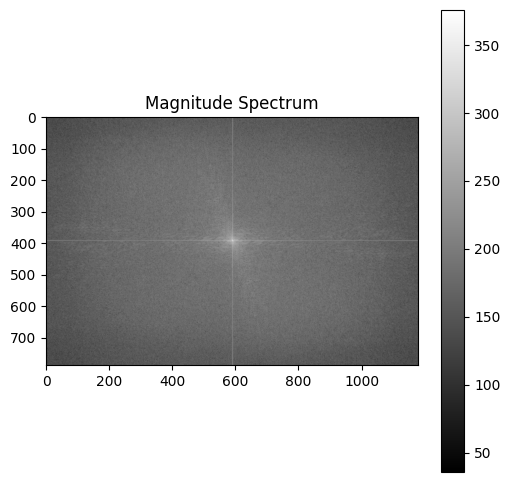

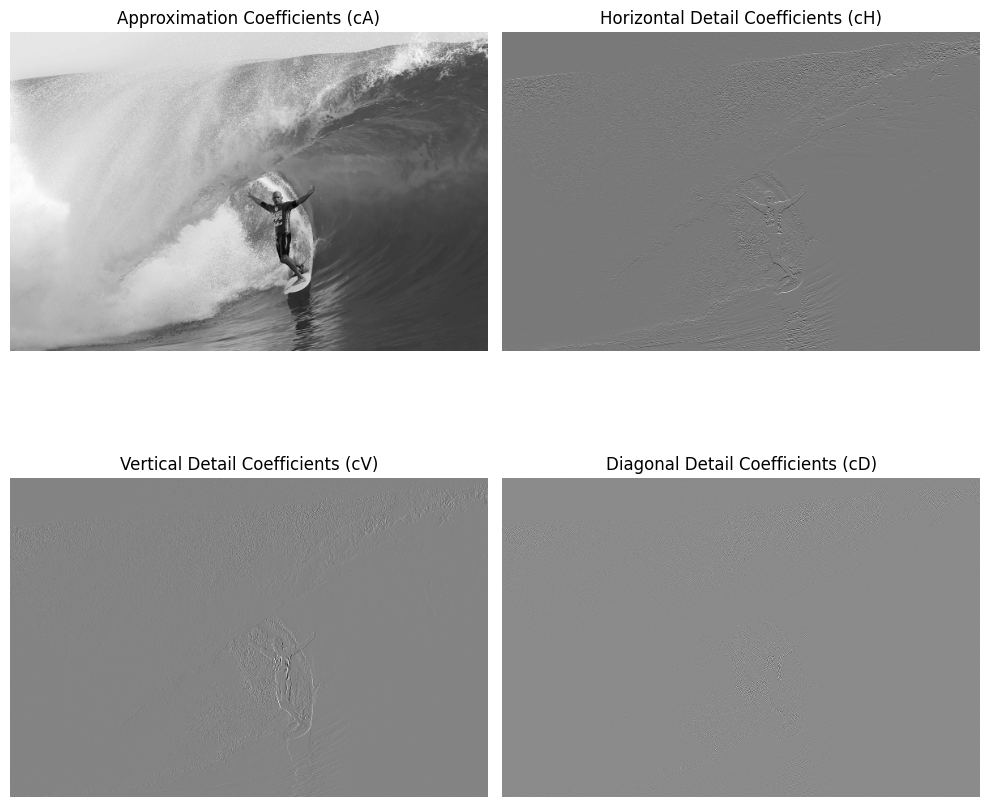

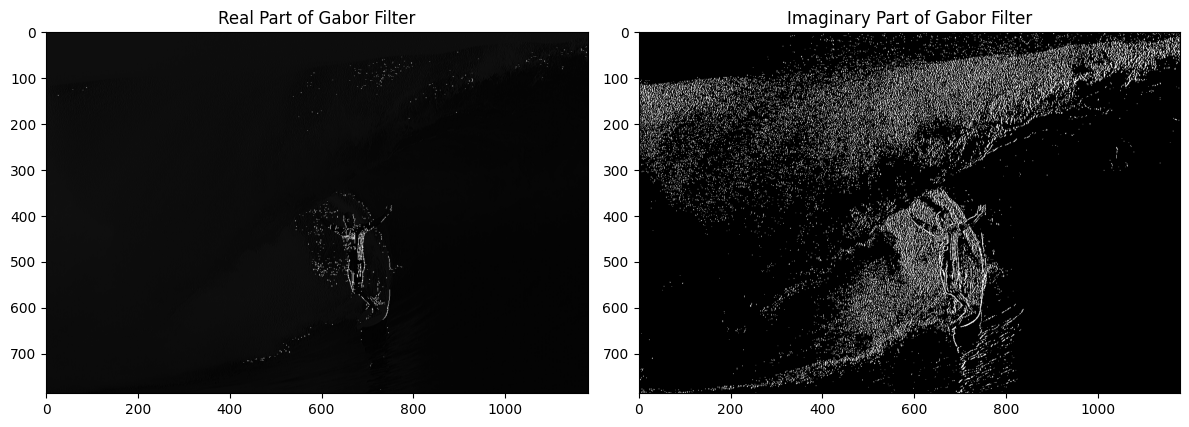

In [13]:
from frequency_domain_features import compute_dft, compute_dwt, apply_gabor_filter
from frequency_domain_features import visualize_dft, visualize_dwt, visualize_gabor

dft = compute_dft(image)
dwt = compute_dwt(image)
gabor = apply_gabor_filter(image)

visualize_dft(dft)
visualize_dwt(*dwt)
visualize_gabor(*gabor)

## Color and Intensity Features
Histograms, Moments, Normalized RGB/HSV

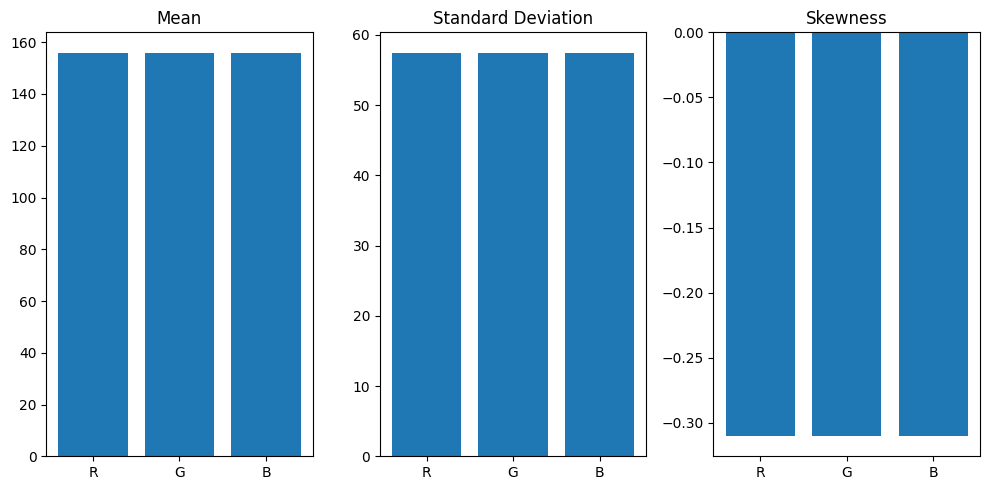

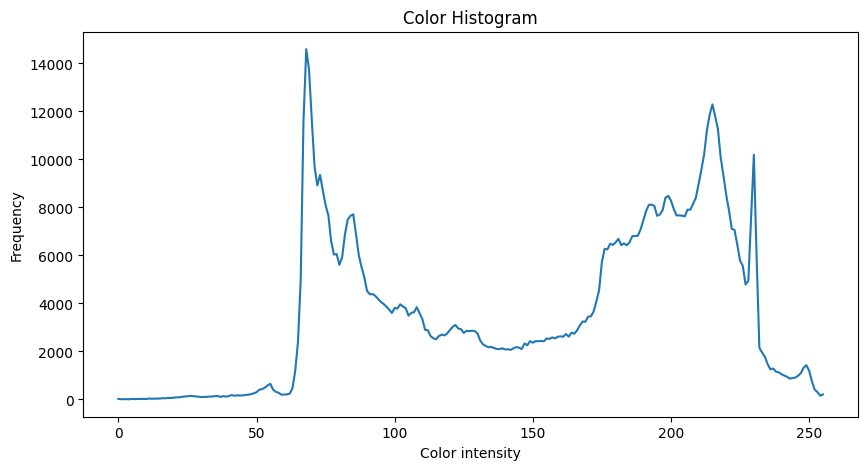

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..358.92856].


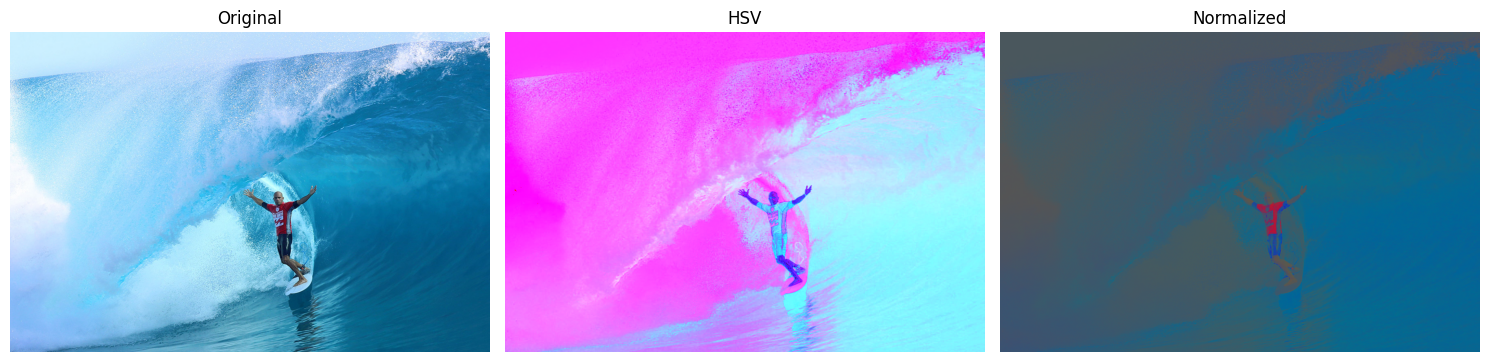

In [19]:
from color_intensity_features import compute_color_histogram, compute_color_moments, normalize_rgb, convert_to_hsv, visualize_color_histogram, visualize_color_moments
import numpy as np

color_histogram = compute_color_histogram(image)
color_moments = compute_color_moments(image)

colored_image = cv2.imread('surfer.jpg').astype(np.float32) / 255
hsv_image = convert_to_hsv(colored_image)
normalized_image = normalize_rgb(colored_image)

visualize_color_moments(*color_moments)
visualize_color_histogram(color_histogram)
visualize_images(
    [colored_image, hsv_image, normalized_image], 
    titles=["Original", "HSV", "Normalized"]
)


## Keypoint Detection and Matching

MSER and KAZE and AKAZE

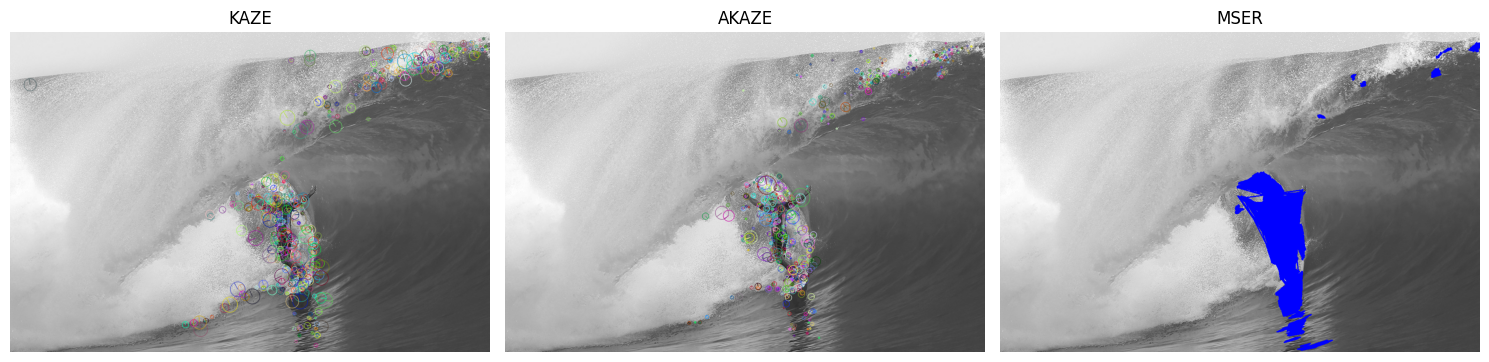

In [23]:
from keypoint_detection import detect_mser, detect_kaze, detect_akaze, get_mser_image

mser_regions = detect_mser(image)
kaze_keypoints = detect_kaze(image)
akaze_keypoints = detect_akaze(image)

images = []
for keypoints in [kaze_keypoints, akaze_keypoints]:
    keypoint_img = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    images.append(keypoint_img)
images.append(get_mser_image(image, mser_regions))

visualize_images(
    images, 
    titles=["KAZE", "AKAZE", "MSER"]
)